In [1]:
# import packages
import numpy as np  
import pandas as pd 
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline

# Dimension Reduction

## load the dataset

In [21]:
mypath = '/Users/yinzi/Downloads/crop_part1'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [22]:
df.head(3)

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...


In [23]:
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')
df.dtypes

age        int64
gender     int64
race       int64
file      object
dtype: object

In [24]:
images = []
for img_path in df['file']:
    img = io.imread(img_path)
    images.append(img)

In [25]:
images[0].shape

(200, 200, 3)

#### start - Prepare the PCA graph for the final presentation

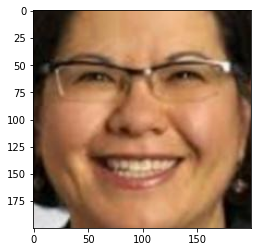

In [34]:
plt.imshow(images[7])

In [18]:
X_original = np.array(images[7]).reshape(1, (200*200*3))

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca= PCA()
pca.fit(X_original)
cum_variance = np.cumsum(pca.explained_variance_ratio_)
print(max(cum_variance))

nan


/Users/yinzi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


### End - prepare the PCA graph for the final presentation

In [26]:
X_train, X_test, y_train, y_test = train_test_split(images, df['gender'], test_size=0.3, random_state=42)

In [27]:
X_train[0].shape

(200, 200, 3)

In [28]:
X_grays = []
for img in X_train:
    img_gray = color.rgb2gray(img)
    X_grays.append(img_gray)

In [29]:
X_grays[0].shape

(200, 200)

In [30]:
X = np.array(X_grays)
X.shape

(6844, 200, 200)

In [31]:
X_flat = np.array(X_grays).reshape((6844, 200*200))
X_flat.shape

(6844, 40000)

## 1. Feature extraction
### 1.1 Principal component analysis - PCA

In [32]:
from sklearn.decomposition import PCA

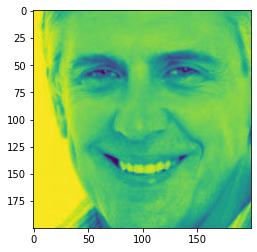

In [33]:
plt.imshow(X_grays[7])

In [35]:
pca_all = PCA(n_components = 600)
pca_all.fit(X_flat)
cum_variance = np.cumsum(pca_all.explained_variance_ratio_)
print(max(cum_variance))

0.9823441146650416


In [27]:
n = np.argmax(cum_variance>=0.95)+1
print(n)

195


Text(0, 0.5, 'Explained Variance')

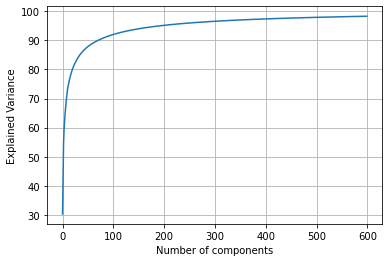

In [32]:
plt.grid()
plt.plot(cum_variance*100)
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

In [33]:
pca = PCA(n_components = 195)
reduced_gimages = pca.fit_transform(X_flat)
recovered_images = pca.inverse_transform(reduced_gimages)

In [34]:
print("reduced gray images shape: " + str(reduced_gimages.shape))
print("recovered images shape: " + str(recovered_images.shape))

reduced gray images shape: (6844, 195)
recovered images shape: (6844, 40000)


In [38]:
img_pca_195 = recovered_images[0, :].reshape([200, 200])

Text(0.5, 1.0, 'Origial gray image')

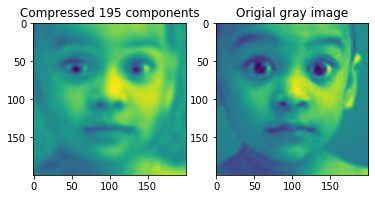

In [45]:
rows, cols = 1, 2
plt.subplot(rows, cols, 1)
plt.imshow(img_pca_195)
plt.title('Compressed 195 components')
plt.subplot(rows, cols, 2)
plt.imshow(X_grays[0])
plt.title('Origial gray image')

* Comparing those two images, we can see that PCA reduces a lot curse dimensions and the picture still looks clear for the face. PCA may help us to improve our models

### 1.2 Non-negative matrix factorization - NMF
* NMF is a powerful unsupervised lering technique that automatically clusters similar elements into groups
* NMF for image processing to recognize the main traits of a face.

In [46]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components = 200, init = 'nndsvda', random_state = 0)
nmf.fit(X_flat)
X_nmf = nmf.transform(X_flat)

In [ ]:
print(X_nmf.shape)
print(nmf_components_.shape)

### 1.3 Independent components Analysis - ICA
* ICA is a machine learning technique to separate independent sources from a mixed signal.

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
ica = FastICA(n_components = 200)
S_ = ica.fit_transform(X_flat)
A_ = ica.mixing_    # get estimated mixing matrix